# Dataset Exploration- Fordgo Bike System
## by Priscilla Ogwa

## Introduction
> This project uses the fordgo Bike System Data, the data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

> I'll be analyzing the data and communicating the findings using univariate, bivariate and multivariate Exploration



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#print shape of dataset and datatype of all coumn
print(fordgobike.shape)
print(fordgobike.dtypes)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
#print first 5 rows of dataset
print(fordgobike.head(5))

   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13

In [5]:
print(fordgobike.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

In [6]:
#make copy of dataset
fordgobike1 = fordgobike.copy()

In [7]:
fordgobike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [8]:
#print number of null values for each column
fordgobike1.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
#drop null values
fordgobike1.dropna(inplace = True)

In [10]:
#convert start time and end time column to datetime datatype
fordgobike1['start_time'] = pd.to_datetime(fordgobike['start_time'])
fordgobike1['end_time'] = pd.to_datetime(fordgobike['end_time'])

In [11]:
#Create column for user age
fordgobike1['member_age'] = 2022-fordgobike1['member_birth_year']

In [12]:
fordgobike1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
member_age                 174952 non-null float64
dtypes: datetime6

In [13]:
#remove unnecessary columns that are not relevant for this analysis
fordgobike1 = fordgobike1.drop(['start_station_longitude', 'end_station_longitude',
                                'start_station_latitude', 'end_station_latitude'], axis=1)

In [14]:
fordgobike1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
member_age                 174952 non-null float64
dtypes: datetime64[ns](2), float64(4), int64(2), object(5)
memory usage: 18.7+ MB


In [15]:
fordgobike1['start_time'].value_counts()

2019-02-07 17:56:08.897    2
2019-02-19 17:52:44.175    2
2019-02-15 08:43:18.422    2
2019-02-06 21:35:57.574    2
2019-02-01 18:24:34.874    2
2019-02-01 13:40:09.492    2
2019-02-11 17:05:07.840    2
2019-02-07 09:06:07.056    2
2019-02-15 07:47:00.197    2
2019-02-22 20:11:42.256    2
2019-02-25 08:52:07.582    2
2019-02-11 08:53:40.903    1
2019-02-10 12:27:19.377    1
2019-02-22 15:57:28.396    1
2019-02-19 08:14:44.002    1
2019-02-28 15:11:36.854    1
2019-02-14 14:09:38.897    1
2019-02-14 16:36:57.153    1
2019-02-12 08:34:23.032    1
2019-02-06 10:25:37.882    1
2019-02-27 10:01:03.409    1
2019-02-20 09:02:59.287    1
2019-02-05 11:19:00.174    1
2019-02-27 17:29:23.592    1
2019-02-23 19:37:02.619    1
2019-02-28 10:02:00.452    1
2019-02-28 19:02:23.641    1
2019-02-01 16:53:57.598    1
2019-02-13 16:07:03.898    1
2019-02-07 15:07:36.931    1
                          ..
2019-02-08 12:12:44.163    1
2019-02-16 14:59:13.178    1
2019-02-17 15:43:24.296    1
2019-02-13 17:

In [16]:
print(fordgobike1['member_gender'].unique())

['Male' 'Other' 'Female']


In [17]:
fordgobike1['member_age'].describe()

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: member_age, dtype: float64

In [18]:
print(fordgobike1['user_type'].unique())

['Customer' 'Subscriber']


In [19]:
fordgobike1 = fordgobike1.reindex(columns=['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'bike_id', 'user_type', 'bike_share_for_all_trip', 'member_birth_year','member_age', 'member_gender'])

In [20]:
fordgobike1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,bike_share_for_all_trip,member_birth_year,member_age,member_gender
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,No,1984.0,38.0,Male
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,No,1972.0,50.0,Male
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,No,1989.0,33.0,Other
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Yes,1974.0,48.0,Male
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,No,1959.0,63.0,Male


### What is the structure of your dataset?

> There are 174952 bikes in the dataset with 13 features (duration_sec, start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, bike_share_for_all_trip, member_birth_year, member_age, member_gender).

> The age range of members span from 21 to 144, there are 2 user type customer and subscriber and 3 genders male, female and others. All users appeared to start their trip in February 2019.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the duration of a trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. User type
2. Member Gender
3. Member Age
4. Start month and End month
5. Start weekday and End weekday

## Univariate Exploration

##### I'll start by looking at the distribution of the main variable of interest: duration.


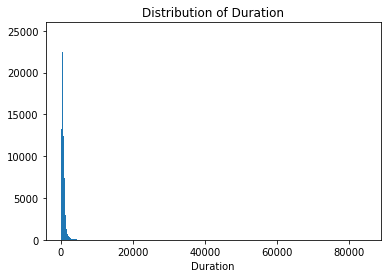

In [21]:
# plot distribution of age
binsize = 100
bins = np.arange(0, fordgobike1['duration_sec'].max()+binsize, binsize)
plt.hist(data = fordgobike1, x = 'duration_sec', bins = bins)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.show()

Distribution for duration_sec is not clear enough, so I set the limit to 5000 and increased the size of the figure

In [22]:
fordgobike1['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

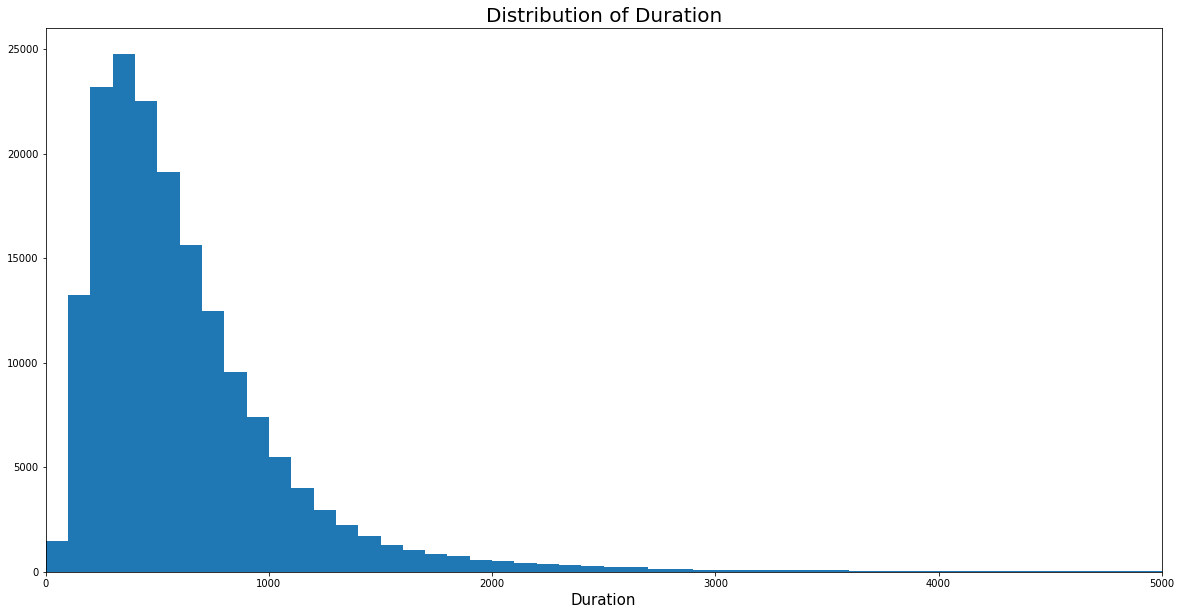

In [23]:
binsize = 100
bins = np.arange(0, fordgobike1['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[20, 10])
plt.xlim(0, 5000)
plt.hist(data = fordgobike1, x = 'duration_sec', bins = bins)
plt.title('Distribution of Duration', size=20)
plt.xlabel('Duration', size=15)
plt.show()

In [24]:
fordgobike1['duration_min'] = fordgobike1['duration_sec'] / 60

In [25]:
fordgobike1['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [26]:
np.log10(fordgobike1['duration_min'].describe())

count    5.242919
mean     1.069423
std      1.437276
min      0.007179
25%      0.731051
50%      0.929419
75%      1.118926
max      3.148952
Name: duration_min, dtype: float64

Duration variable was changed to minutes, and log scale was used

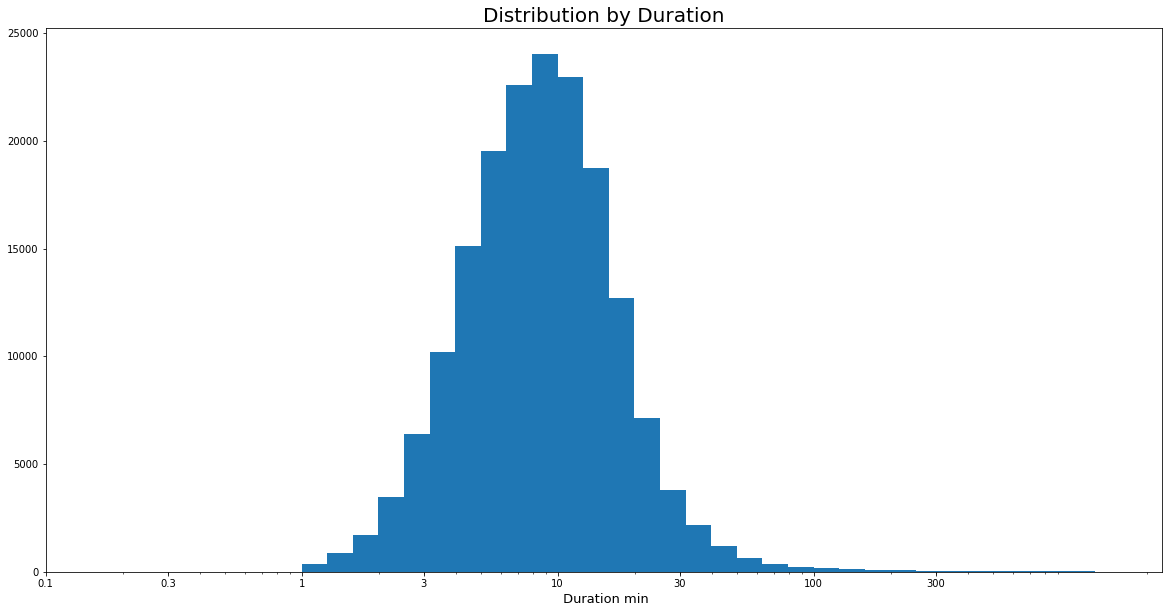

In [27]:
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(fordgobike1['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[20, 10])
plt.hist(data = fordgobike1, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel(' Duration min', size=13)
plt.title('Distribution by Duration', size=20)
plt.show();

Duration in seconds is right skewed with a long tail, showing that most trips were for a stort period. However distrubtion of duration in minutes using the log scale has a unimodal form.

##### Gender

In [28]:
fordgobike1['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

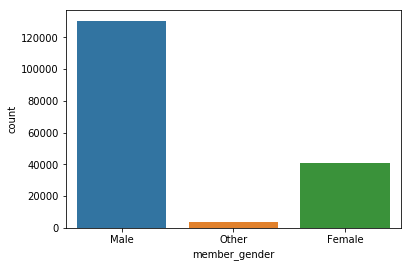

In [29]:
sb.countplot(data=fordgobike1, x='member_gender');

In [30]:
base_color = sb.color_palette()[0]
n_points = fordgobike1.shape[0]

In [31]:
gender_counts = fordgobike1['member_gender'].value_counts()

# Get the indexes of the gender Series
gender_order = gender_counts.index

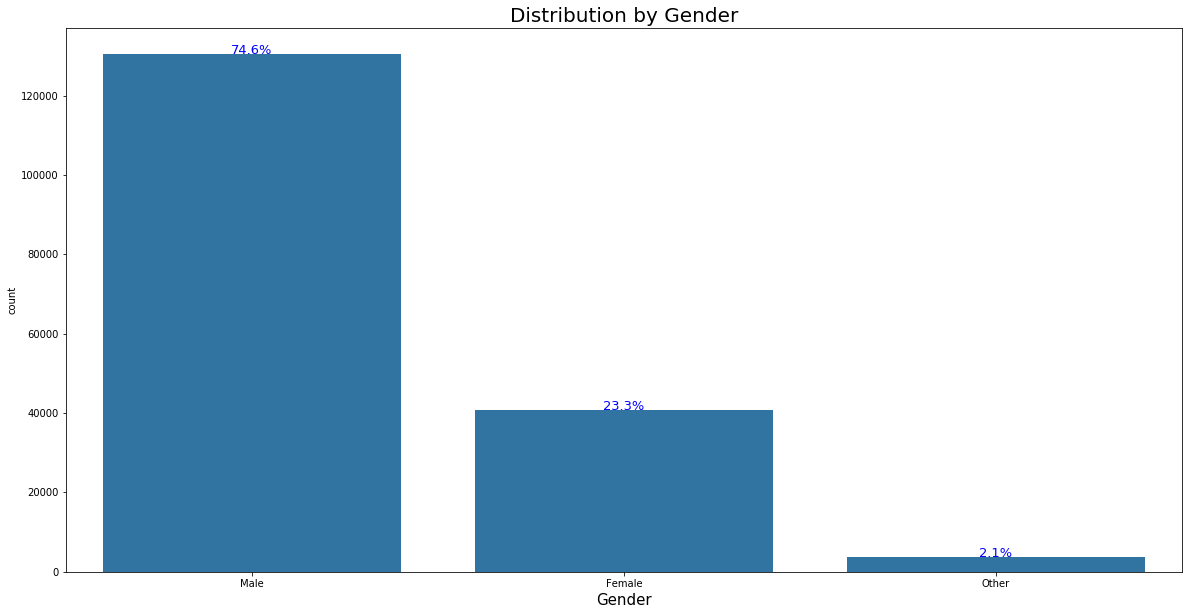

In [32]:
# plot distribution of gender
plt.figure(figsize=[20, 10])
sb.countplot(data = fordgobike1, x = 'member_gender', color = base_color, order=gender_order)

gender_counts = fordgobike1['member_gender'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='b', size=13)

plt.title('Distribution by Gender', size=20)
plt.xlabel('Gender', size=15)

plt.show()

I changed the multicolor in the first column into a base color, increased the fig size and also inculuded the percentage of each bar. I also ordered the chart in descending order.

The graph shows that most of the users are male, the number of male and female users is significantly different.

#####  User Type

In [33]:
fordgobike1.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [34]:
user_counts = fordgobike1['user_type'].value_counts()

# Get the indexes of the usertype 
user_order = user_counts.index

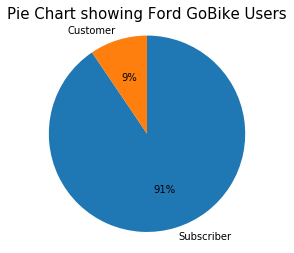

In [35]:
plt.pie(user_counts, labels = user_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("Pie Chart showing Ford GoBike Users", fontsize=15, y=1)
plt.axis('square');

The pie chart above shows percentage of users based on their user_type.

There is a huge percentage disparity between subscribers and customers, with subscribers having 91%

##### Start Day

In [36]:
fordgobike1['start day'] = fordgobike1['start_time'].dt.strftime('%a')

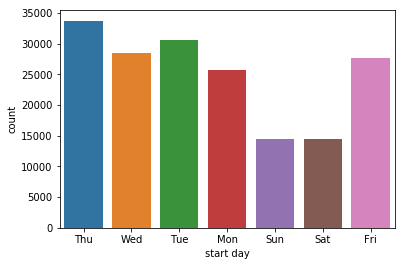

In [37]:
sb.countplot(data=fordgobike1, x='start day');

In [38]:
day_counts = fordgobike1['start day'].value_counts()
# Get the indexes of the day Series
day_order = day_counts.index

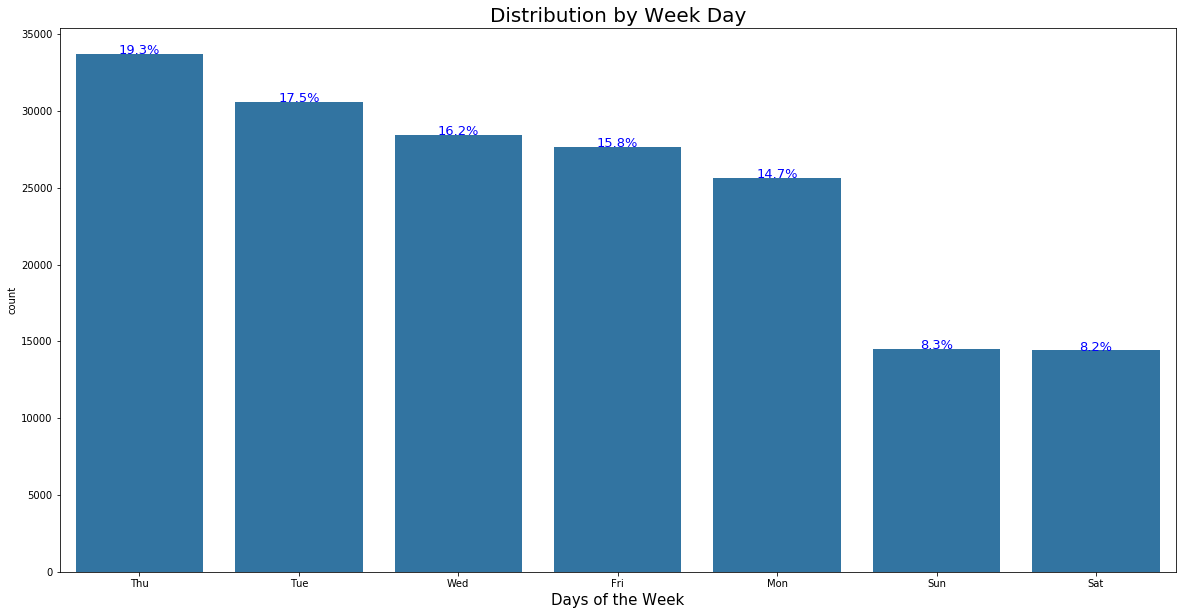

In [39]:
# plot distribution of days of the week
plt.figure(figsize=[20, 10])
sb.countplot(data = fordgobike1, x = 'start day', color = base_color, order=day_order)

locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = day_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='b', size=13)

plt.title('Distribution by Week Day', size=20)
plt.xlabel('Days of the Week', size=15)

plt.show()

I changed the multicolor in the graph to the base color, put it in decreasing order, and added the percentage count for each day of the week.

The start day depits the day most users are likely to take a trip. According to the graph, Thursdays are the most likely day for travelers.


#####  Member Age

In [40]:
fordgobike1['member_age'].describe()

count    174952.000000
mean         37.196865
std          10.118731
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: member_age, dtype: float64

In [41]:
age = fordgobike1['member_age'] > 100
print (age.value_counts())

False    174877
True         75
Name: member_age, dtype: int64


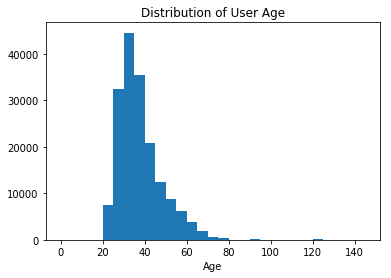

In [42]:
# plot distribution of age
binsize =5
bins = np.arange(0, fordgobike1['member_age'].max()+binsize, binsize)
plt.hist(data = fordgobike1, x = 'member_age', bins = bins)
plt.xlabel('Age')
plt.title('Distribution of User Age')
plt.show()

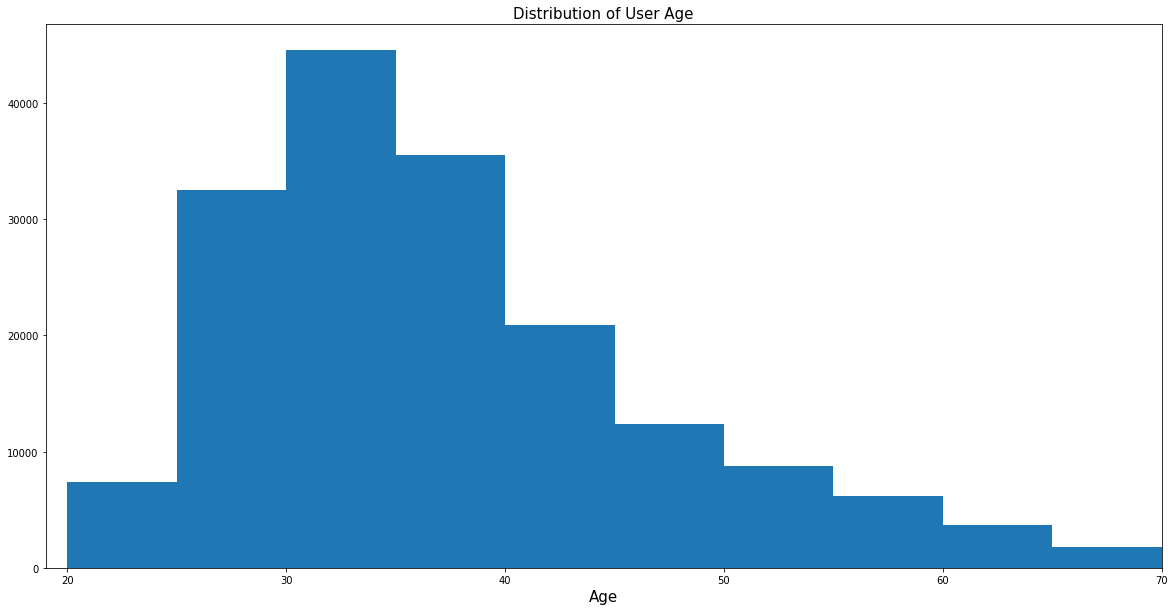

In [43]:
# plot distribution of age
plt.figure(figsize = [20, 10])

binsize = 5
bins = np.arange(0, fordgobike1['member_age'].max()+binsize, binsize)

plt.hist(data = fordgobike1, x = 'member_age', bins = bins)
plt.xlim(19, 70)
plt.xlabel('Age', size=15)
plt.title('Distribution of User Age', size=15)
plt.show()

The age range in this data set spans from 21 to 144, I reduced the graph to show only ages between 21 and 70. Most users are between 30 and 35 years, the count of users 


## Bivariate Exploration


#####  Age and Duration

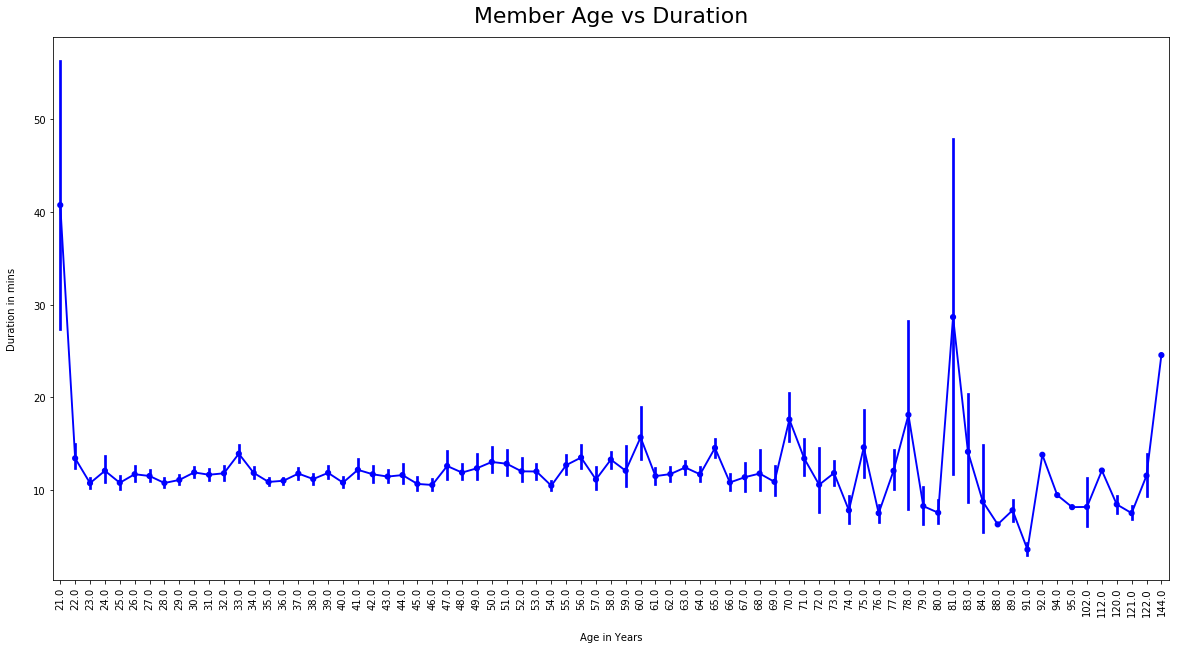

In [44]:
plt.figure(figsize=(20,10))
sb.pointplot(data = fordgobike1, x='member_age', y='duration_min', scale=.7, color='blue')
plt.title('Member Age vs Duration', fontsize=22, y=1.015)
plt.xlabel('Age in Years', labelpad=16)
plt.ylabel('Duration in mins', labelpad=16)
plt.xticks(rotation = 90);

The line graph shows the relationship netween age and Duration, age 22 to 69 have a fairly steady duration for which they ride, age 21 appears th ride for the longest period of time

##### Gender and Duration

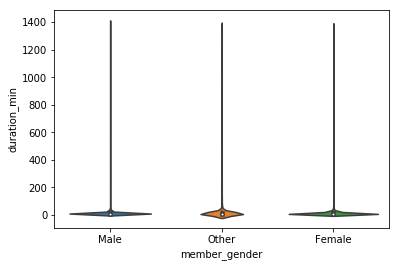

In [45]:
sb.violinplot(data= fordgobike1, y='duration_min', x='member_gender');

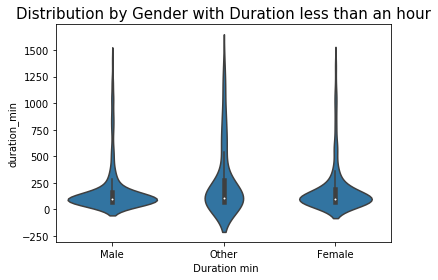

In [46]:
duration_query = fordgobike1.query("duration_min >60")
sb.violinplot(data= duration_query, y='duration_min', x='member_gender', color=base_color);
plt.xlabel(' Duration min', size=10)
plt.title('Distribution by Gender with Duration less than an hour', size=15)
plt.show();

The voilin plot shows the relationship between gender and duration.They are all There is a Log-normal distribution in gender, there are more data points in male considering the fact that there are more males.


##### Gender and User type

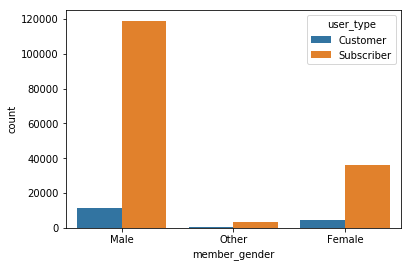

In [47]:
sb.countplot(data = fordgobike1, x = 'member_gender', hue = 'user_type');

The barchart shows the relationship between user_type and gender. It gives the distintive count for each gender according to their user_type. From the previous univariant graph, it was stated that there are more males than females, and more subscriber thancustomers, also, this chart shows that the male subcribers have the highest count.


#####  Birth year and User type

In [48]:
fordgobike1['member_birth_year'].describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

I grouped users using their birth year according to their generations

In [49]:
fordgobike1.loc[fordgobike1["member_birth_year"] < 1883, 'generations'] = 'Too Old'
fordgobike1.loc[fordgobike1["member_birth_year"].between(1883, 1900), 'generations'] = 'Lost Generation'
fordgobike1.loc[fordgobike1["member_birth_year"].between(1901, 1927), 'generations'] = 'Greatest Generation'
fordgobike1.loc[fordgobike1["member_birth_year"].between(1928, 1945), 'generations'] = 'Silent Generation'
fordgobike1.loc[fordgobike1["member_birth_year"].between(1946, 1964), 'generations'] = 'Baby Boomers'
fordgobike1.loc[fordgobike1["member_birth_year"].between(1965, 1980), 'generations'] = 'Generation X'
fordgobike1.loc[fordgobike1["member_birth_year"].between(1981, 1996), 'generations'] = 'Millenials'
fordgobike1.loc[fordgobike1["member_birth_year"].between(1997, 2012), 'generations'] = 'Generation Z'

In [50]:
fordgobike1['generations'].value_counts()

Millenials             118411
Generation X            36568
Generation Z            10897
Baby Boomers             8706
Silent Generation         294
Lost Generation            53
Greatest Generation        22
Too Old                     1
Name: generations, dtype: int64

In [51]:
gen_counts = fordgobike1.groupby(['generations', 'user_type']).size()
gen_counts = gen_counts.reset_index(name='count')
gen_counts = gen_counts.pivot(index = 'generations', columns = 'user_type', values = 'count')

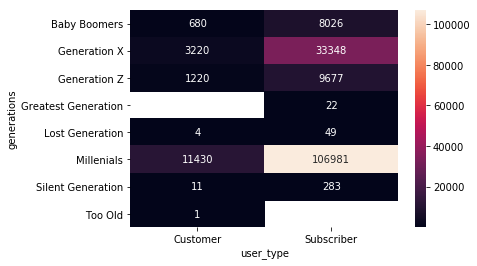

In [52]:
sb.heatmap(gen_counts, annot = True, fmt = '.0f');

The heat chart shows the relationship between user_type and generations. Millenials have the highest count for both customers and subscribers, while greatest generation have the lowest count customers with a count of 0 and Too old have the lowest count subscribers with a count of 0.

#####  Start Day and Gender

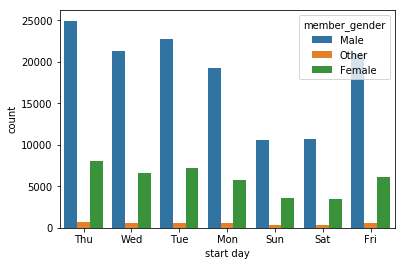

In [53]:
sb.countplot(data = fordgobike1, x = 'start day', hue = 'member_gender');

The bar chart shows the relationship between startday and gender, Most users for both male and female gender start their trip on thursdays.

##### Duration min and User type

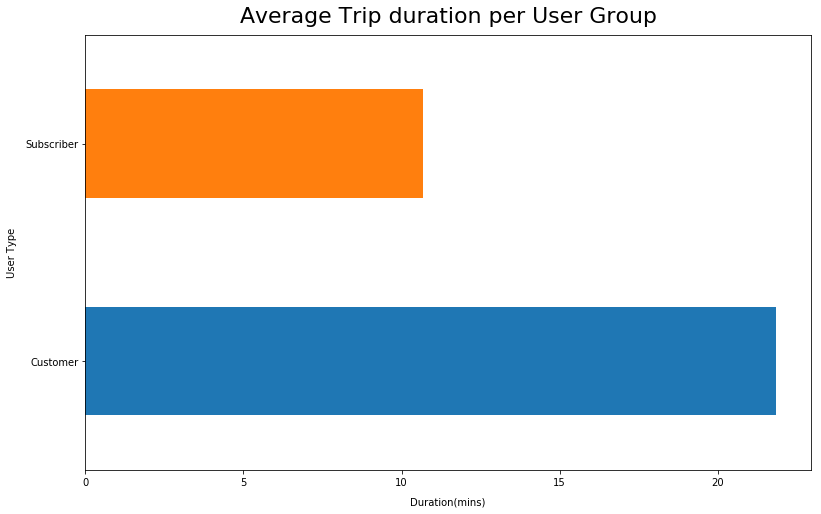

In [54]:
dur = fordgobike1.groupby('user_type')['duration_min'].mean().plot(kind='barh', figsize=(13,8))
dur.set_title('Average Trip duration per User Group', fontsize=22, y=1.015)
dur.set_ylabel('User Type', labelpad=8)
dur.set_xlabel('Duration(mins)', labelpad=10);

Customers make lengthier trips than subscribers do.

## Multivariate Exploration

##### Duration_min, User type and Gender


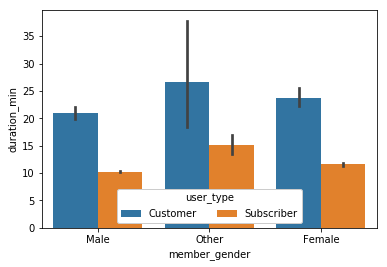

In [55]:
gen = sb.barplot(data = fordgobike1, x = 'member_gender', y = 'duration_min', hue = 'user_type')
gen.legend(loc = 8, ncol = 3, framealpha = 1, title = 'user_type');

Customer users with no clearly specified gender take the longest trips, this is closely followed by the female customers, then the male customers. Similar pattern can be observed also in subscribers.

##### Duration mins, User type and Generations

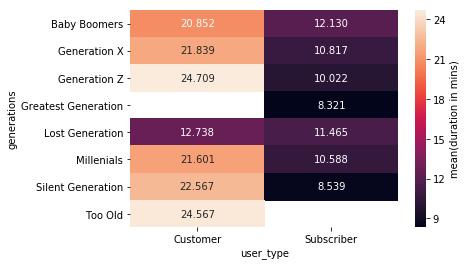

In [56]:
dur_means = fordgobike1.groupby(['user_type', 'generations']).mean()['duration_min']
dur_means = dur_means.reset_index(name = 'duration_avg')
dur_means = dur_means.pivot(index = 'generations', columns = 'user_type',
                            values = 'duration_avg')
sb.heatmap(dur_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration in mins)'});

Generation Z customers take the longest trips, this is closely followed by the only Too Old Customer.
The least durations aside the zeros is the Greatest generation subscribers and the Silent generation subscribers

## Conclusions

The average trip duration that users took was 10mins and most trips began on Thursdays. 74.6% of users were males and 91% of users were subscribers. Customers with no cleary specified gender travelled the longest trip.

The longest trip would posssibly be a customer in Generation Z with no clearly specified gender.




In [57]:
fordgobike1.to_csv('fordgobike1.csv', 
                 index=False, encoding = 'utf-8')